<a href="https://colab.research.google.com/github/Rkjha6634/Bank-Customer-Churn/blob/main/DATA_ANALYST_CUSTOMER_CHURN_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data  = pd.read_excel('/content/CUSTOMER CHURN TXT.xlsx')
df = pd.DataFrame(data)

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
df.shape

(10000, 18)

In [ ]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [ ]:
column =  [ 'CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary','Exited', 'Complain',
       'Satisfaction Score','Point Earned']

In [ ]:
DES_DF = df[column]

In [ ]:
DES_DF.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [ ]:
cat_col  = [col for col in df.columns if df[col].dtype == 'O']
CAT_COL = df[cat_col]

In [ ]:
CAT_COL

,Surname,Geography,Gender,Card Type
0,Hargrave,France,Female,DIAMOND
1,Hill,Spain,Female,DIAMOND
2,Onio,France,Female,DIAMOND
3,Boni,France,Female,GOLD
4,Mitchell,Spain,Female,GOLD
...,...,...,...,...
9995,Obijiaku,France,Male,DIAMOND
9996,Johnstone,France,Male,PLATINUM
9997,Liu,France,Female,SILVER
9998,Sabbatini,Germany,Male,GOLD


Text(0, 0.5, 'TOTAL COUNT')

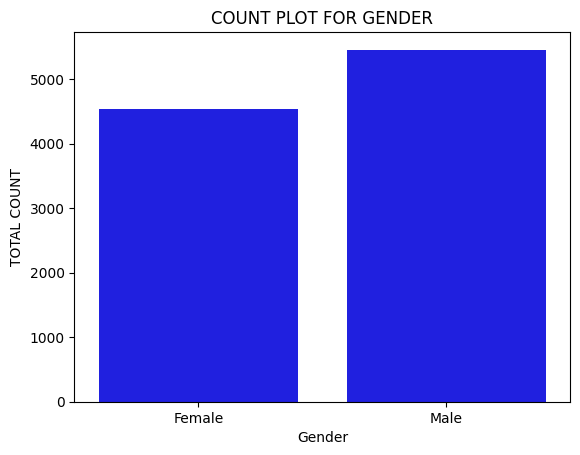

In [ ]:
sns.countplot(data = CAT_COL ,x = 'Gender',color='blue')
plt.title('COUNT PLOT FOR GENDER')
plt.xlabel('Gender')
plt.ylabel('TOTAL COUNT')

Text(0, 0.5, 'TOTAL COUNT')

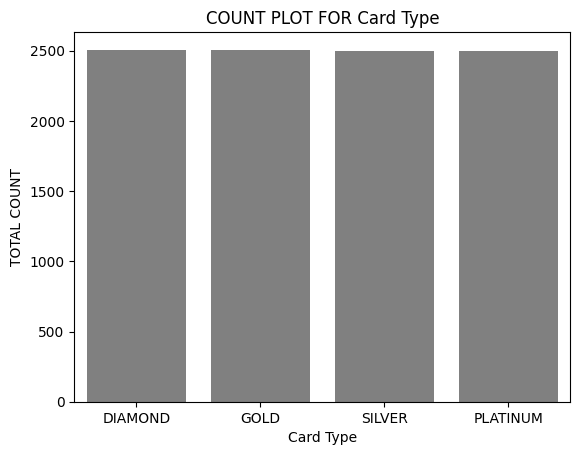

In [ ]:
sns.countplot(data = CAT_COL ,x = 'Card Type',color='grey')
plt.title('COUNT PLOT FOR Card Type')
plt.xlabel('Card Type')
plt.ylabel('TOTAL COUNT')

In [ ]:
df['Card Type'].value_counts()

DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: Card Type, dtype: int64

In [ ]:
num_col = [col for col in df.columns if df[col].dtype != 'O']
NUM_COL = df[num_col]

In [ ]:
NUM_COL

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,2,464
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,5,350
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,0,0,1,300
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,0,0,5,771
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,1,1,3,564
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,1,1,2,339


In [ ]:
viz_columns = ['CreditScore','Age','Tenure','Balance','EstimatedSalary','Point Earned','Satisfaction Score']
NUM_VIZ  = df[viz_columns]


In [ ]:
def Numerical_Plot(data, column):
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 2, 1)
    plt.grid(color='black', linestyle='-', linewidth=0.25)
    sns.boxplot(data[column])
    plt.xticks(horizontalalignment="center", fontsize=15)
    plt.xlabel(f"\n{str(column)}", fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(f"\n{str(column)} Box Plot\n", fontsize=15)

    plt.subplot(1, 2, 2)
    plt.grid(color='black', linestyle='-', linewidth=0.25)
    sns.histplot(data=data, x=column, kde=True)
    plt.xticks(horizontalalignment="center", fontsize=15)
    plt.xlabel(f"\n{str(column)}", fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(f"{str(column)} - Distribution Plot\n", fontsize=15)

    plt.show()

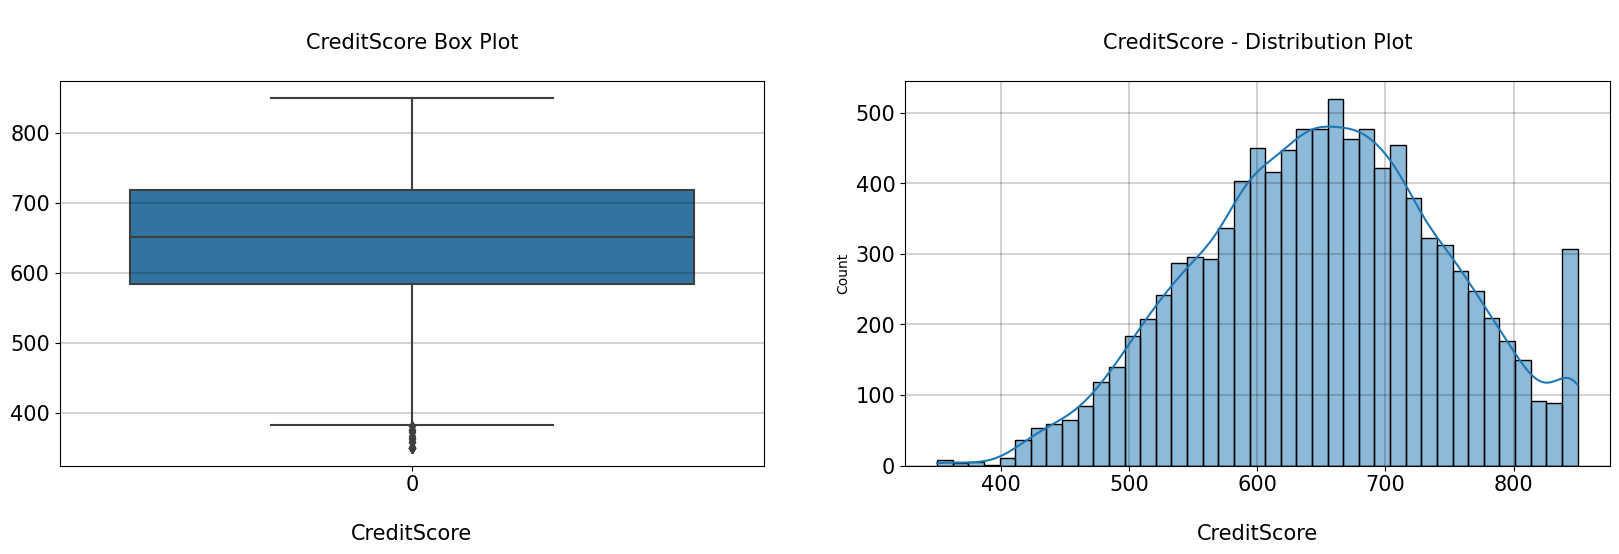

In [ ]:
Numerical_Plot(NUM_VIZ,'CreditScore')

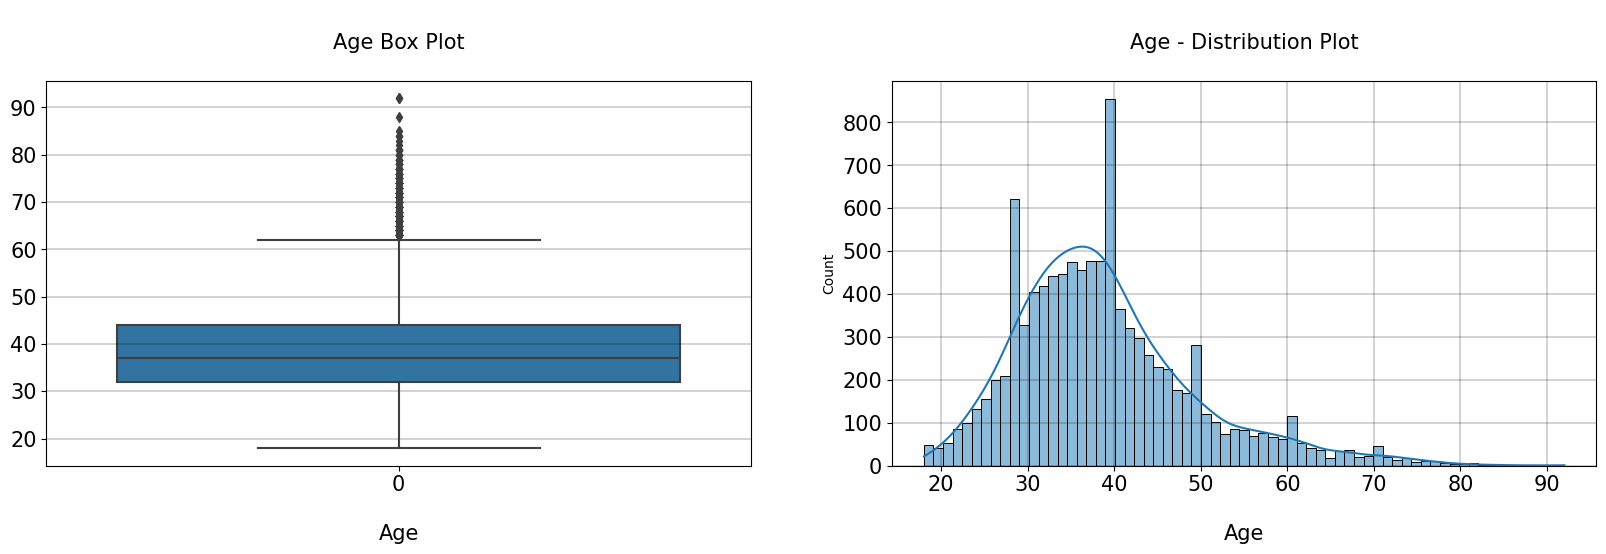

In [ ]:
Numerical_Plot(NUM_VIZ,'Age')

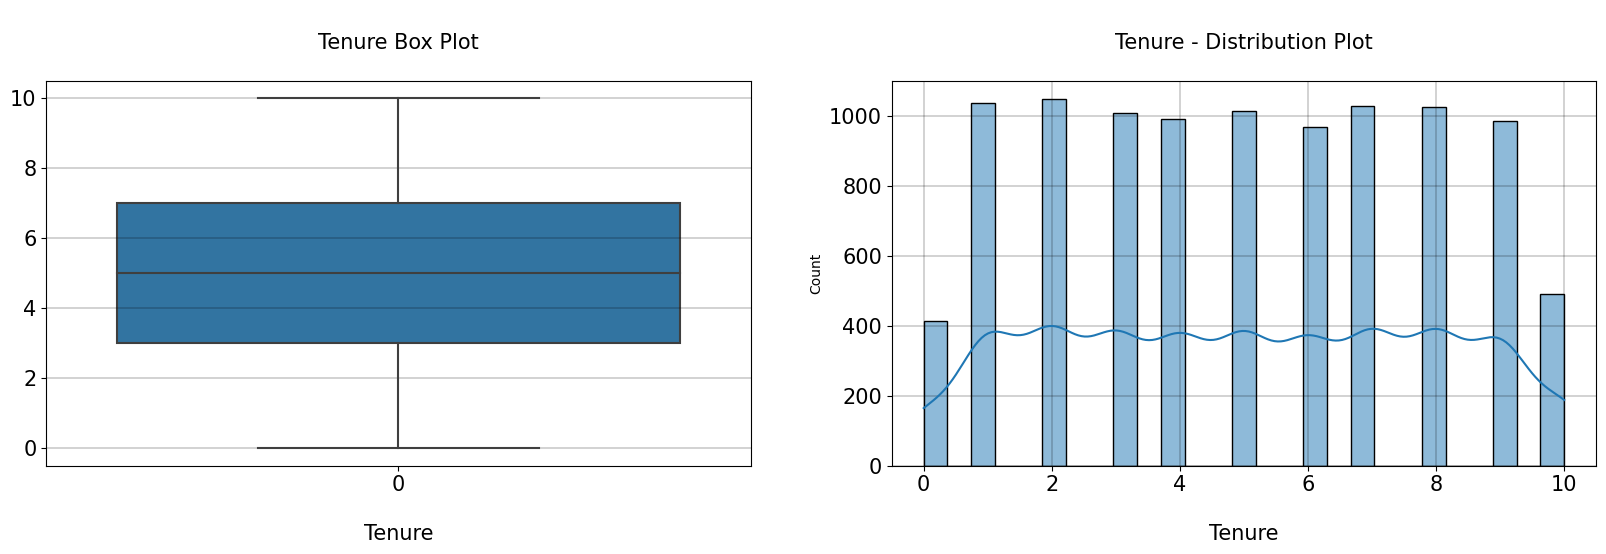

In [ ]:
Numerical_Plot(NUM_VIZ,'Tenure')

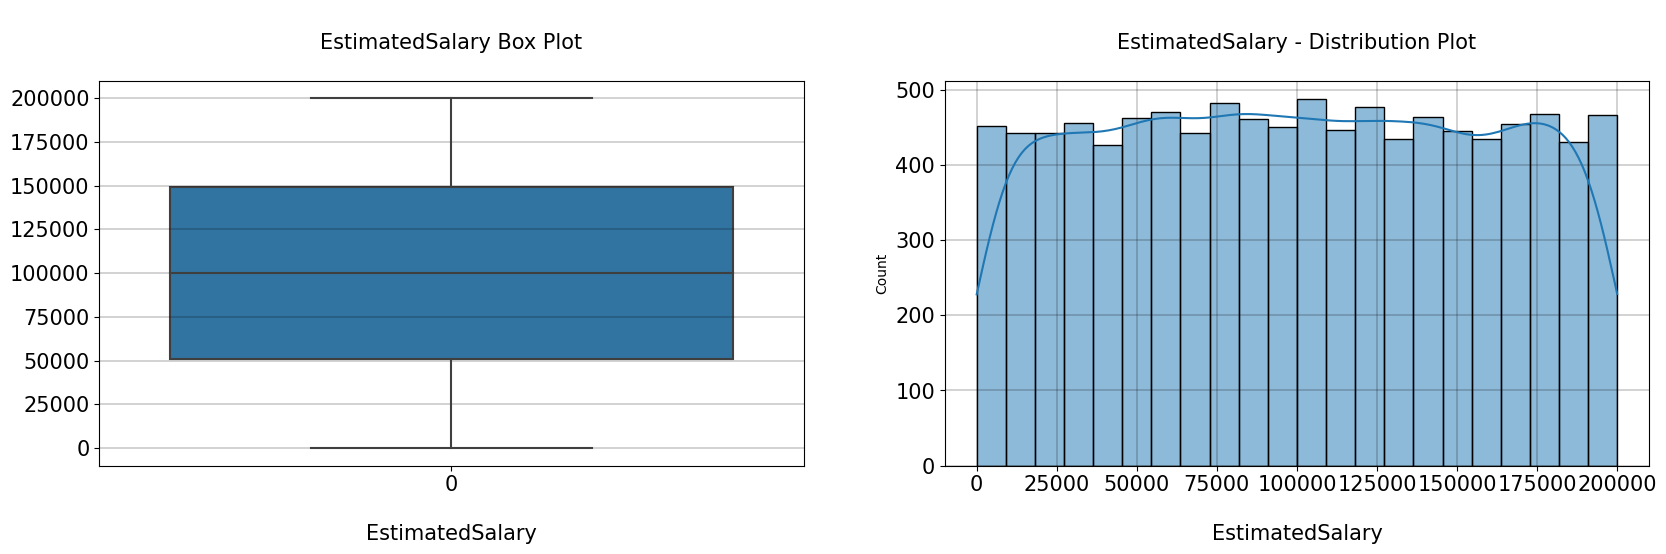

In [ ]:
Numerical_Plot(NUM_VIZ,'EstimatedSalary')

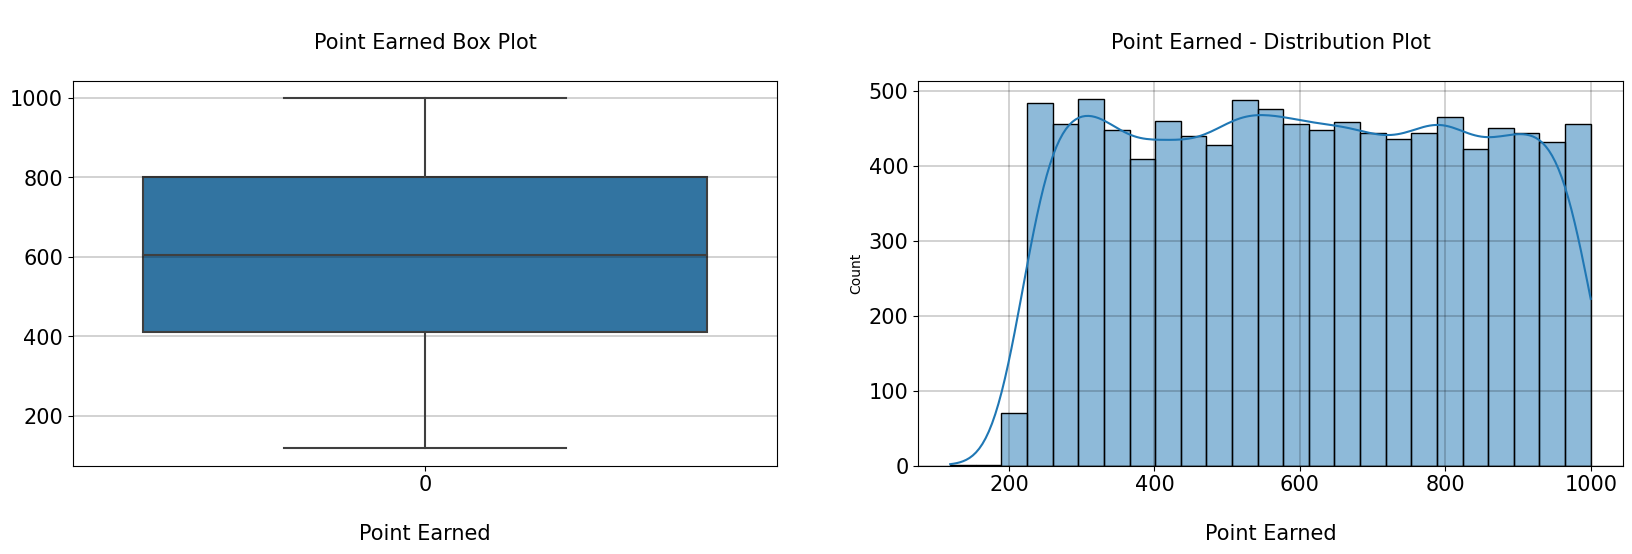

In [ ]:
Numerical_Plot(NUM_VIZ,'Point Earned')

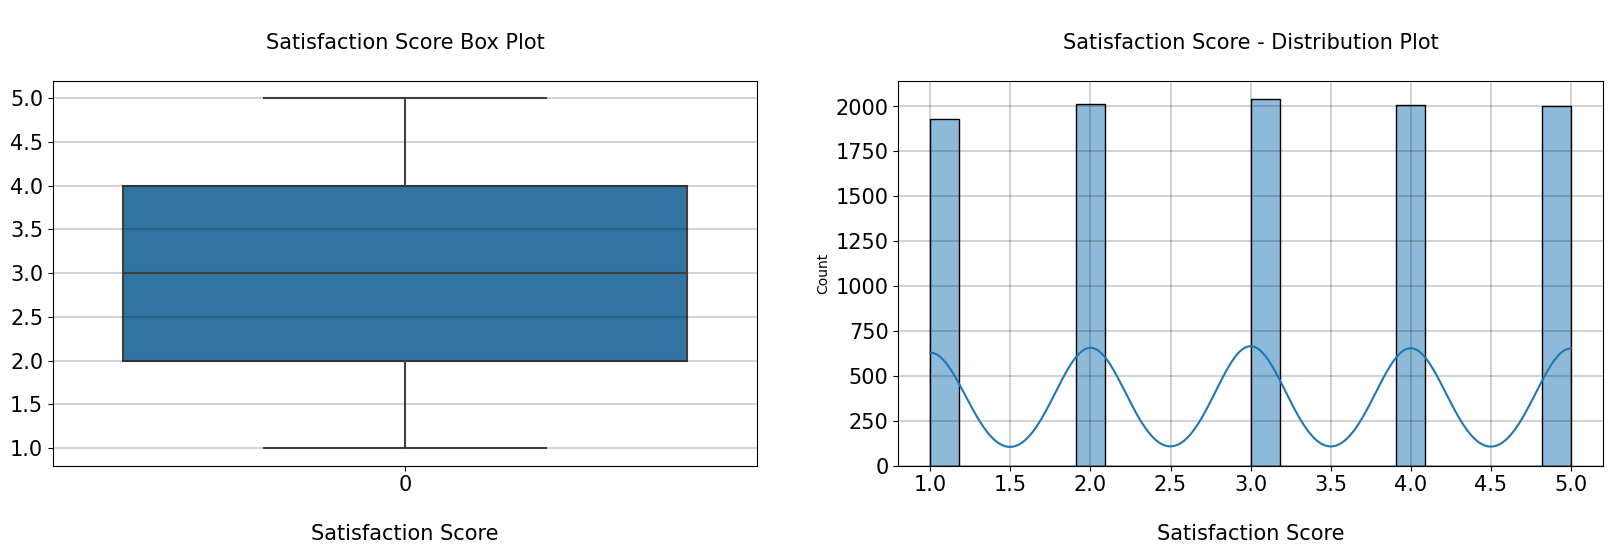

In [ ]:
Numerical_Plot(NUM_VIZ,'Satisfaction Score')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
df['HasCrCard'] = df['HasCrCard'].replace({1: 'Yes', 0: 'No'})

In [ ]:
df['IsActiveMember'] = df['IsActiveMember'].replace({1: 'Yes', 0: 'No'})

In [ ]:
df['Exited'] = df['Exited'].replace({1: 'Yes', 0: 'No'})

In [ ]:
df['Complain'] = df['Complain'].replace({1: 'Yes', 0: 'No'})

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes,Yes,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No,Yes,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes,Yes,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,No,No,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No,No,5,GOLD,425


Text(0, 0.5, 'TOTAL COUNT')

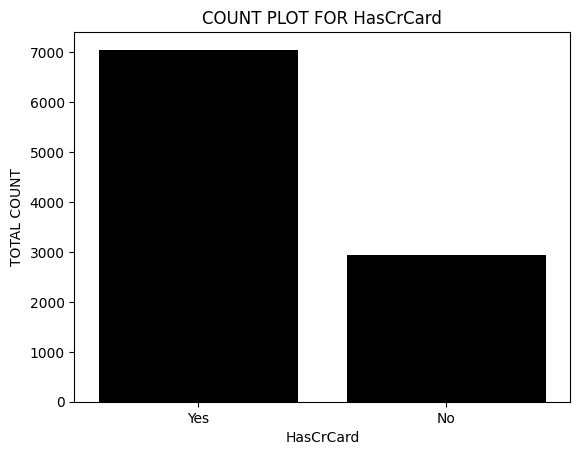

In [ ]:
sns.countplot(data = df ,x = 'HasCrCard',color='Black')
plt.title('COUNT PLOT FOR HasCrCard')
plt.xlabel('HasCrCard')
plt.ylabel('TOTAL COUNT')

Text(0, 0.5, 'TOTAL COUNT')

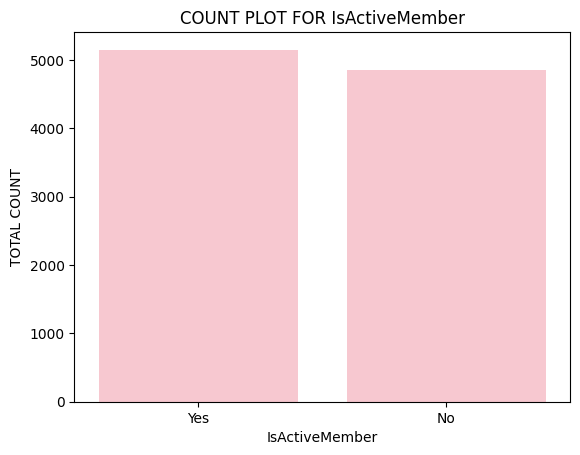

In [ ]:
sns.countplot(data = df ,x = 'IsActiveMember',color='PINK')
plt.title('COUNT PLOT FOR IsActiveMember')
plt.xlabel('IsActiveMember')
plt.ylabel('TOTAL COUNT')

Text(0, 0.5, 'TOTAL COUNT')

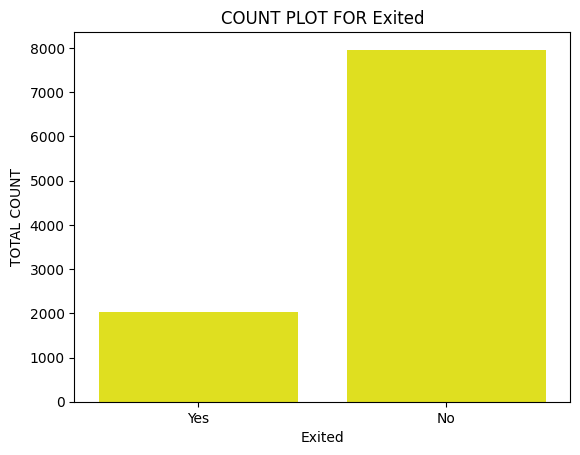

In [ ]:
sns.countplot(data = df ,x = 'Exited',color='YELLOW')
plt.title('COUNT PLOT FOR Exited')
plt.xlabel('Exited')
plt.ylabel('TOTAL COUNT')

Text(0, 0.5, 'TOTAL COUNT')

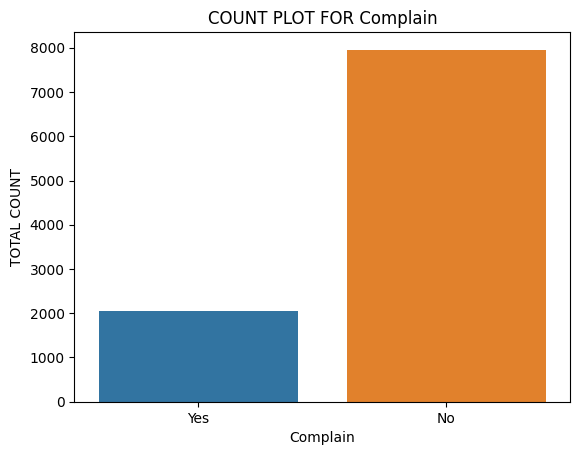

In [ ]:
sns.countplot(data = df ,x = 'Complain')
plt.title('COUNT PLOT FOR Complain')
plt.xlabel('Complain')
plt.ylabel('TOTAL COUNT')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes,Yes,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No,Yes,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes,Yes,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,No,No,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No,No,5,GOLD,425


In [ ]:
total_customers = len(df)
churned_customers = len(df[df['Exited'] == 'Yes'])
churn_rate = churned_customers / total_customers

print(f"Overall Churn Rate: {churn_rate * 100:.2f}%")


Overall Churn Rate: 20.38%


THE OVERALL CHURN RATE IN THIS DATA SET IS 20.38%bold text

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [ ]:
df['Exited'] = df['Exited'].map({'Yes': 1, 'No': 0})

In [ ]:
correlation = df.corr()['Exited'].sort_values(ascending=False)


In [ ]:
print(correlation)

Exited                1.000000
Age                   0.285296
Balance               0.118577
EstimatedSalary       0.012490
Point Earned         -0.004628
Satisfaction Score   -0.005849
CustomerId           -0.006203
Tenure               -0.013656
RowNumber            -0.016140
CreditScore          -0.026771
NumOfProducts        -0.047611
Name: Exited, dtype: float64


THE CORELEATION OF EXITED WITH VARIOUS COLUMNS


In [ ]:
churn_rate_by_geography = df.groupby('Geography')['Exited'].mean()


In [ ]:
churn_rate_by_geography

Geography
France     0.161747
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64

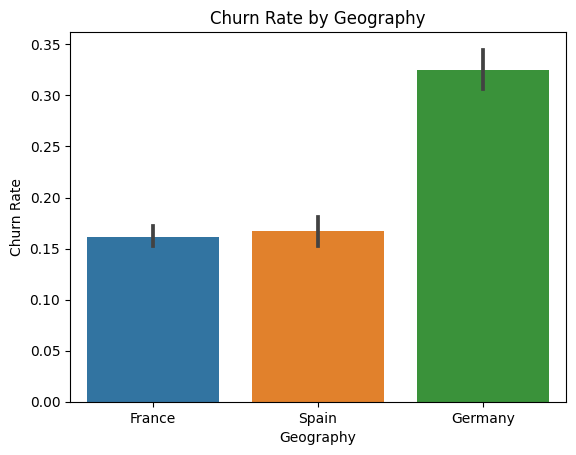

In [ ]:
sns.barplot(x='Geography', y='Exited', data=df)
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Churn Rate')
plt.show()

GERMNAY HAS THE HIEGHEST CHURN RATE WHICH IS 32.44%
FOLLOWED BY SPAIN WHICH HAS 16.17%
THEN FRANCE WHICH HAS 16.67%




In [ ]:
churn_rate_by_GENDER = df.groupby('Gender')['Exited'].mean()

In [ ]:
churn_rate_by_GENDER

Gender
Female    0.250715
Male      0.164743
Name: Exited, dtype: float64

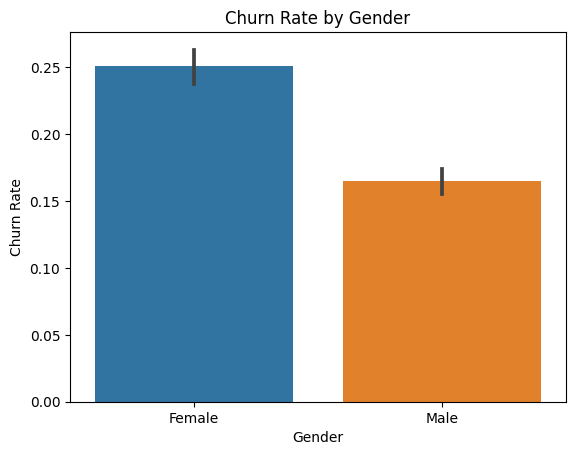

In [ ]:
sns.barplot(x='Gender', y='Exited', data=df)
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.show()

FEMALE HAS THE MORE CHURN RATE WHICH IS 25% WHERE AS MEN HAVE 16.47%

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,1,Yes,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,0,Yes,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,1,Yes,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,0,No,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,0,No,5,GOLD,425


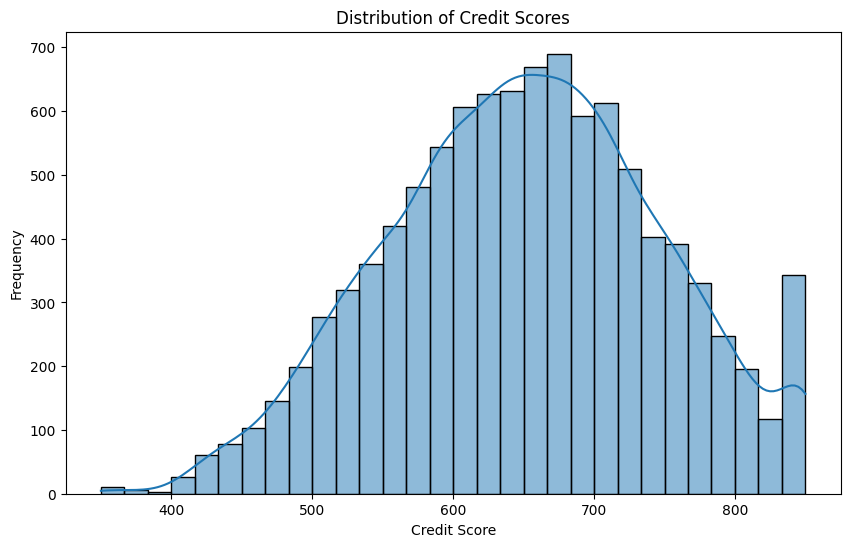

650.5288
652.0
96.65329873613035


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['CreditScore'], bins=30, kde=True)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

credit_score_mean = df['CreditScore'].mean()
credit_score_median = df['CreditScore'].median()
credit_score_std = df['CreditScore'].std()


print(credit_score_mean)
print(credit_score_median)
print(credit_score_std)


The distrubution of Credit Score among customers which is a little left skewed the majority values clustring around the mean which  is 650.50
The mean Credit Score of 650.50 suggests that, on average, customers have a Credit Score around this value.
 The median Credit Score of 652 indicates that the middle value in the distribution is close to this score
 The standard deviation of 96.65 quantifies the spread or dispersion of Credit Scores around the mean

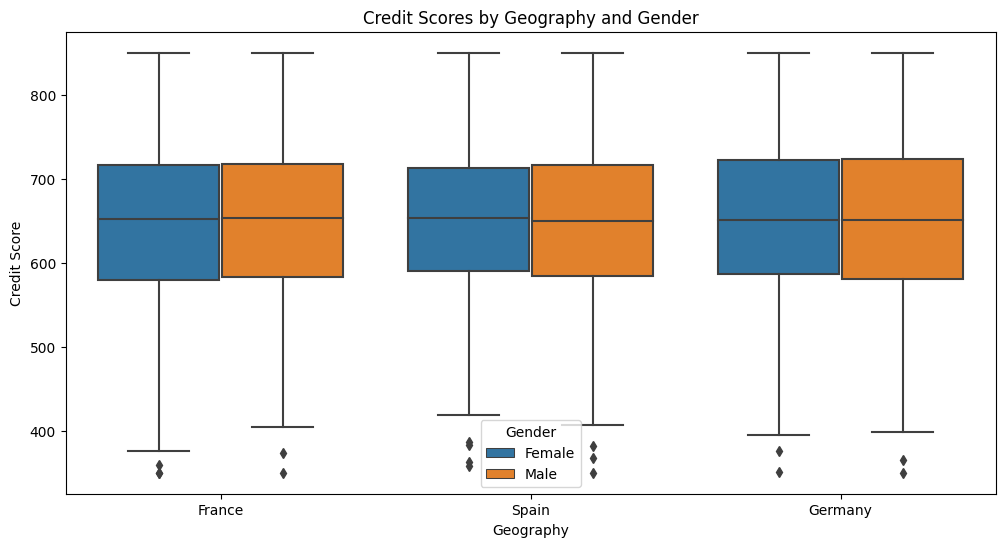

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Geography', y='CreditScore', hue='Gender', data=df)
plt.title('Credit Scores by Geography and Gender')
plt.xlabel('Geography')
plt.ylabel('Credit Score')
plt.show()

 Distrubtion to show how Credit Scores vary by Geography and Gender


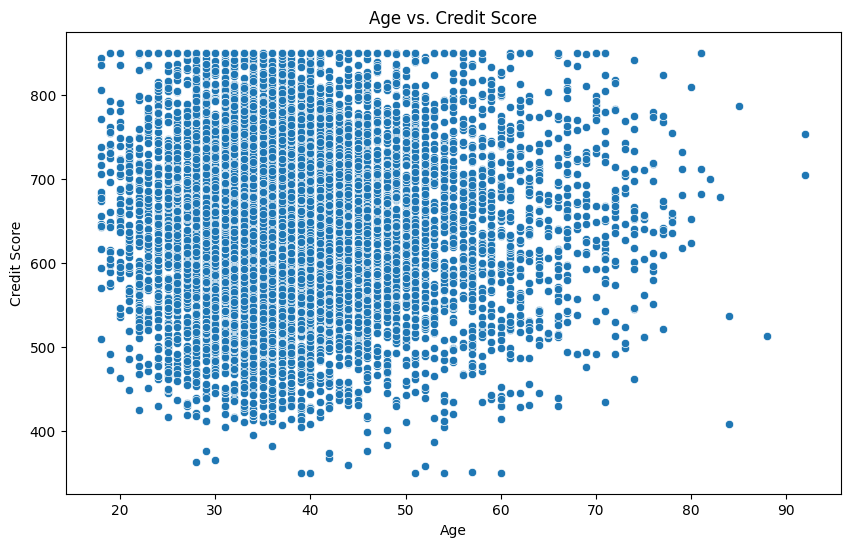

In [ ]:

# Scatter plot between Age and Credit Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='CreditScore', data=df)
plt.title('Age vs. Credit Score')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.show()

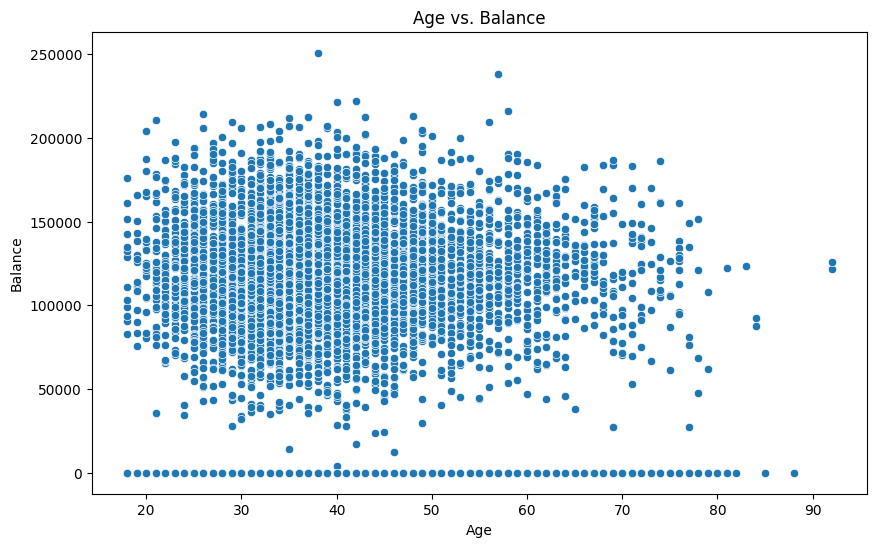

In [ ]:
# Scatter plot between Age and Balance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Balance', data=df)
plt.title('Age vs. Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()


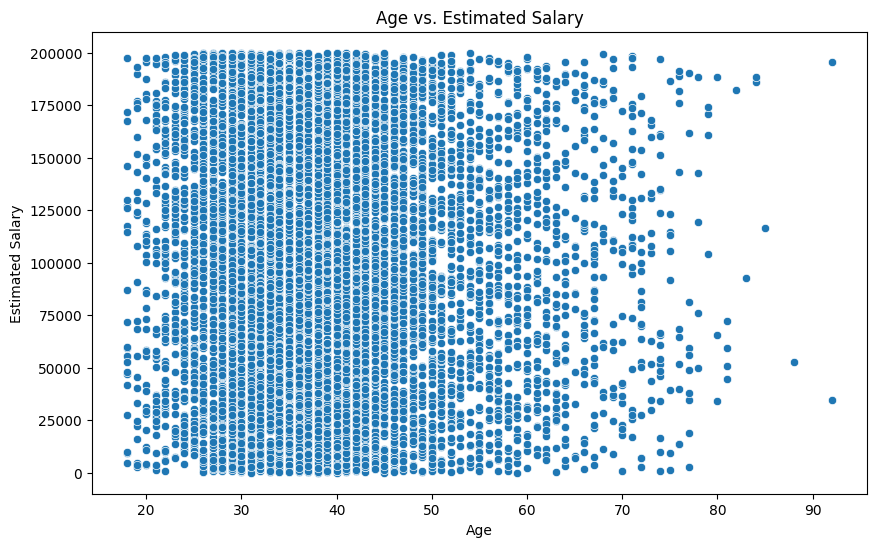

In [ ]:
# Scatter plot between Age and Estimated Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='EstimatedSalary', data=df)
plt.title('Age vs. Estimated Salary')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

In [ ]:
age_credit_score_corr = df['Age'].corr(df['CreditScore'])
age_balance_corr = df['Age'].corr(df['Balance'])
age_salary_corr = df['Age'].corr(df['EstimatedSalary'])

print(age_credit_score_corr)
print(age_balance_corr)
print(age_salary_corr)


-0.003964905525390069
0.02830836832749169
-0.007201042376657299


                                                                                                                                           

1.   correlation between Age and Credit Score is approximately -0.00396 which means  there no linear reletionship between them .

2.   correlation between Age and Balance is approximately 0.028, which is very weak positive correlation which means there is very slight tendency for older customers to have slightly higher account balance


2.    correlation  between Age and Estimated Salary is approximately -0.00720, indicating another very weak negative correlation



In [ ]:
avg_age_churned = df[df['Exited'] == 1]['Age'].mean()
avg_age_not_churned = df[df['Exited'] == 0]['Age'].mean()
print("\nAverage Age of Churned Customers:", avg_age_churned)
print("Average Age of Non-Churned Customers:", avg_age_not_churned)



Average Age of Churned Customers: 44.83562315996075
Average Age of Non-Churned Customers: 37.40806330067822


In [ ]:
avg_credit_score_churned = df[df['Exited'] == 1]['CreditScore'].mean()
avg_credit_score_not_churned = df[df['Exited'] == 0]['CreditScore'].mean()
print("\nAverage Credit Score of Churned Customers:", avg_credit_score_churned)
print("Average Credit Score of Non-Churned Customers:", avg_credit_score_not_churned)


Average Credit Score of Churned Customers: 645.4146221786065
Average Credit Score of Non-Churned Customers: 651.8378548103492


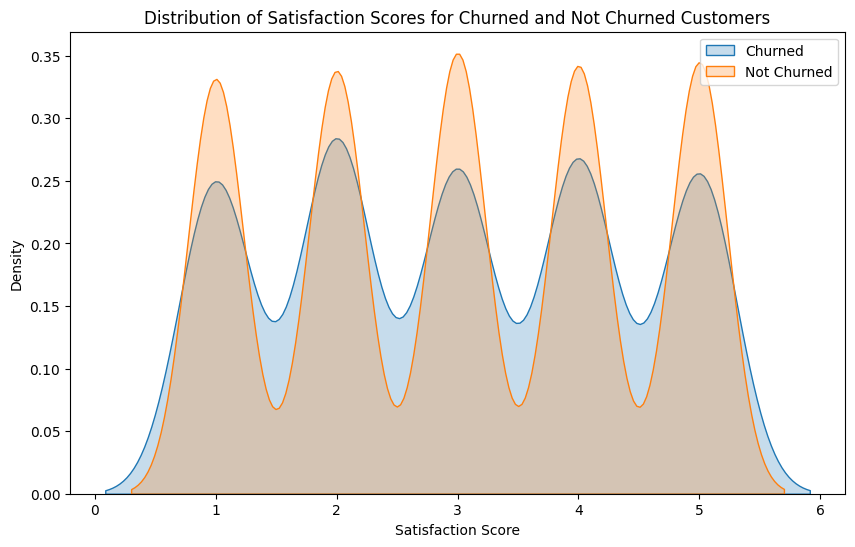

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Exited'] == 1]['Satisfaction Score'], label='Churned', shade=True)
sns.kdeplot(df[df['Exited'] == 0]['Satisfaction Score'], label='Not Churned', shade=True)
plt.xlabel('Satisfaction Score')
plt.ylabel('Density')
plt.title('Distribution of Satisfaction Scores for Churned and Not Churned Customers')
plt.legend()
plt.show()


In [ ]:
average_tenure_by_card_type = df.groupby('Card Type')['Tenure'].mean()
print("Average Tenure by Card Type:")
print(average_tenure_by_card_type)


Average Tenure by Card Type:
Card Type
DIAMOND     5.009174
GOLD        5.074341
PLATINUM    4.918637
SILVER      5.048878
Name: Tenure, dtype: float64


In [ ]:
average_tenure_by_satisfaction = df.groupby('Satisfaction Score')['Tenure'].mean()
print("\nAverage Tenure by Satisfaction Score:")
print(average_tenure_by_satisfaction)


Average Tenure by Satisfaction Score:
Satisfaction Score
1    4.917702
2    5.003476
3    5.090108
4    5.074203
5    4.973553
Name: Tenure, dtype: float64


In [ ]:
Estimated_Salary_by_Geography = df.groupby('Geography')['EstimatedSalary'].mean()
Estimated_Salary_by_Geography

Geography
France      99899.180814
Germany    101113.435102
Spain       99440.572281
Name: EstimatedSalary, dtype: float64

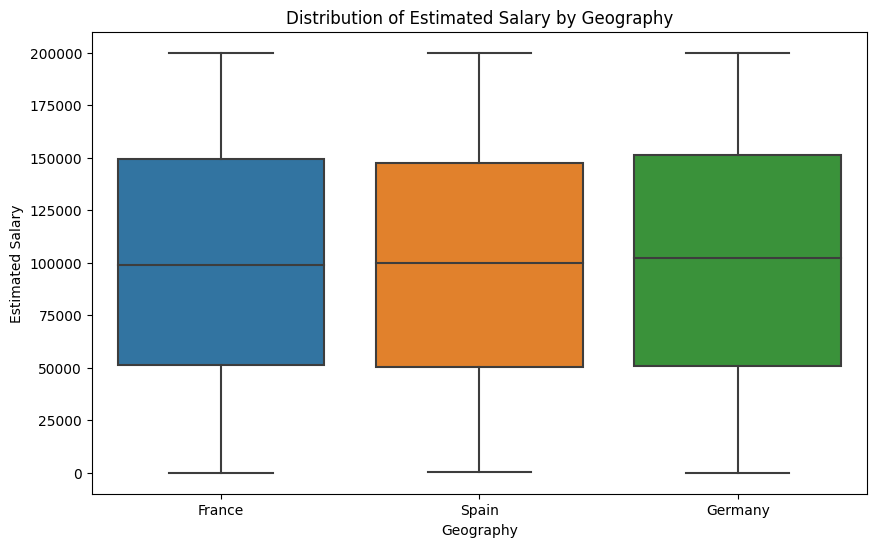

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Geography', y='EstimatedSalary', data=df)
plt.xlabel('Geography')
plt.ylabel('Estimated Salary')
plt.title('Distribution of Estimated Salary by Geography')
plt.show()



1.   The Average salary of customers by geography where France  has average of  99899.180814
2.    Germany has 101113.43510  
3.   Spain has 99440.572281






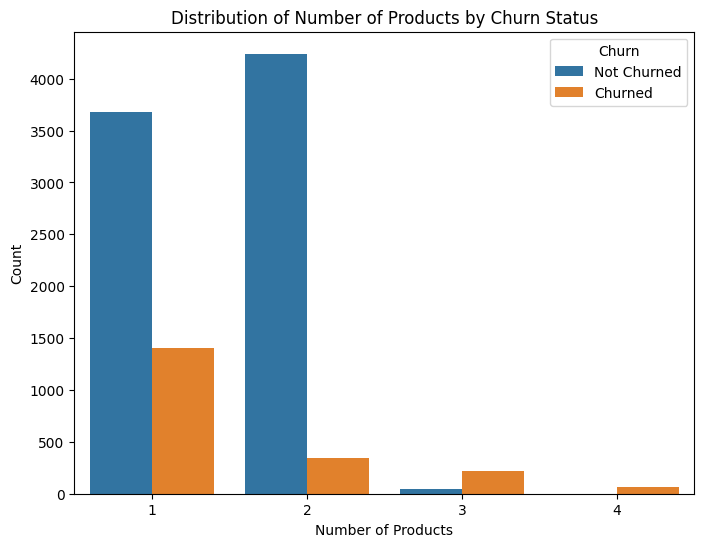

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.title('Distribution of Number of Products by Churn Status')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()

customers who use a larger number of products indeed exhibit higher churn rates

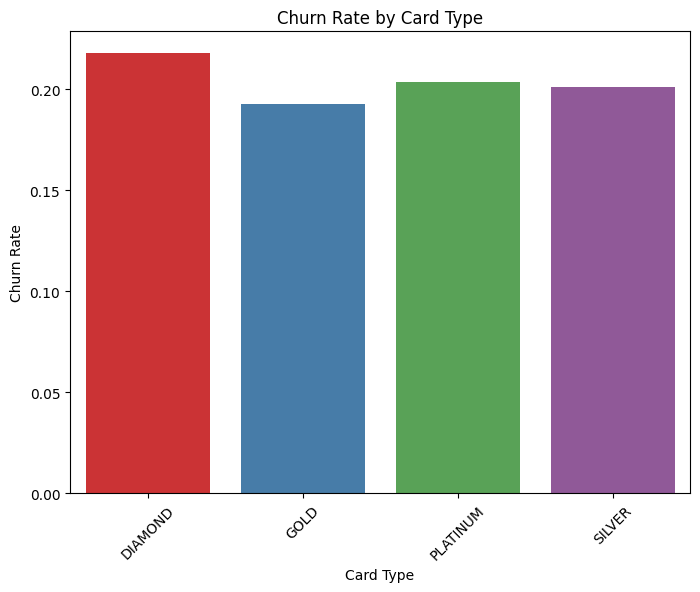

  Card Type    Exited
0   DIAMOND  0.217790
1      GOLD  0.192646
2  PLATINUM  0.203607
3    SILVER  0.201122


In [ ]:
churn_rate_by_card_type = df.groupby('Card Type')['Exited'].mean().reset_index()


plt.figure(figsize=(8, 6))
sns.barplot(x='Card Type', y='Exited', data=churn_rate_by_card_type, palette='Set1')
plt.xlabel('Card Type')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Card Type')
plt.xticks(rotation=45)
plt.show()

print(churn_rate_by_card_type)

1.   Approximately 21.78% of customers with DIAMOND cards have churned. This indicates that DIAMOND cardholders have a relatively higher churn rate compared to other card types.
2.   19.27% of customers with GOLD cards have churned. GOLD cardholders have a slightly lower churn rate compared to DIAMOND cardholders.
3.   20.36% of customers with PLATINUM cards have churned. The churn rate for PLATINUM cardholders falls between that of DIAMOND and GOLD cardholders.
4.   20.11% of customers with SILVER cards have churned. SILVER cardholders have a churn rate similar to PLATINUM cardholders.







